<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n250.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.878875,0.731534,107.610409,105.363910,2.246499
1,0.0,1.0,34.977134,-1.447484,43.529650,44.997322,-1.467673
2,0.0,2.0,33.100337,-9.431154,33.669184,43.167071,-9.497887
3,0.0,3.0,61.677977,-2.364431,69.313546,71.035989,-1.722443
4,0.0,4.0,80.605389,-5.057053,85.548335,89.494003,-3.945668
...,...,...,...,...,...,...,...
59995,999.0,55.0,85.312216,-11.532695,83.779521,95.112263,-11.332742
59996,999.0,56.0,25.414462,9.644997,45.059459,35.431472,9.627987
59997,999.0,57.0,60.113022,2.401286,72.514309,70.004346,2.509963
59998,999.0,58.0,96.663223,-0.596693,106.066530,106.422154,-0.355624


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.878875,0.731534,107.610409,105.363910,2.246499
1,0.0,1.0,34.977134,-1.447484,43.529650,44.997322,-1.467673
2,0.0,2.0,33.100337,-9.431154,33.669184,43.167071,-9.497887
3,0.0,3.0,61.677977,-2.364431,69.313546,71.035989,-1.722443
4,0.0,4.0,80.605389,-5.057053,85.548335,89.494003,-3.945668
...,...,...,...,...,...,...,...
59995,999.0,55.0,85.312216,-11.532695,83.779521,95.112263,-11.332742
59996,999.0,56.0,25.414462,9.644997,45.059459,35.431472,9.627987
59997,999.0,57.0,60.113022,2.401286,72.514309,70.004346,2.509963
59998,999.0,58.0,96.663223,-0.596693,106.066530,106.422154,-0.355624


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    96.878875   0.731534  107.610409  105.363910   2.246499
      1.0    34.977134  -1.447484   43.529650   44.997322  -1.467673
      2.0    33.100337  -9.431154   33.669184   43.167071  -9.497887
      3.0    61.677977  -2.364431   69.313546   71.035989  -1.722443
      4.0    80.605389  -5.057053   85.548335   89.494003  -3.945668
...                ...        ...         ...         ...        ...
999.0 55.0   85.312216 -11.532695   83.779521   95.112263 -11.332742
      56.0   25.414462   9.644997   45.059459   35.431472   9.627987
      57.0   60.113022   2.401286   72.514309   70.004346   2.509963
      58.0   96.663223  -0.596693  106.066530  106.422154  -0.355624
      59.0   86.021201  24.792672  120.813873   95.818680  24.995193

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    96.878875   0.731534  107.610409  105.363910   2.246499
      1.0    34.977134  -1.447484   43.529650   44.997322  -1.467673
      2.0    33.100337  -9.431154   33.669184   43.167071  -9.497887
      3.0    61.677977  -2.364431   69.313546   71.035989  -1.722443
      4.0    80.605389  -5.057053   85.548335   89.494003  -3.945668
...                ...        ...         ...         ...        ...
999.0 55.0   85.312216 -11.532695   83.779521   95.112263 -11.332742
      56.0   25.414462   9.644997   45.059459   35.431472   9.627987
      57.0   60.113022   2.401286   72.514309   70.004346   2.509963
      58.0   96.663223  -0.596693  106.066530  106.422154  -0.355624
      59.0   86.021201  24.792672  120.813873   95.818680  24.995193

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.878875,0.731534,107.610409,105.363910,2.246499
1,0.0,1.0,34.977134,-1.447484,43.529650,44.997322,-1.467673
2,0.0,2.0,33.100337,-9.431154,33.669184,43.167071,-9.497887
3,0.0,3.0,61.677977,-2.364431,69.313546,71.035989,-1.722443
4,0.0,4.0,80.605389,-5.057053,85.548335,89.494003,-3.945668
...,...,...,...,...,...,...,...
59995,999.0,55.0,85.312216,-11.532695,83.779521,95.112263,-11.332742
59996,999.0,56.0,25.414462,9.644997,45.059459,35.431472,9.627987
59997,999.0,57.0,60.113022,2.401286,72.514309,70.004346,2.509963
59998,999.0,58.0,96.663223,-0.596693,106.066530,106.422154,-0.355624


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    96.878875   0.731534  107.610409  105.363910   2.246499
      1.0    34.977134  -1.447484   43.529650   44.997322  -1.467673
      2.0    33.100337  -9.431154   33.669184   43.167071  -9.497887
      3.0    61.677977  -2.364431   69.313546   71.035989  -1.722443
      4.0    80.605389  -5.057053   85.548335   89.494003  -3.945668
...                ...        ...         ...         ...        ...
999.0 55.0   85.312216 -11.532695   83.779521   95.112263 -11.332742
      56.0   25.414462   9.644997   45.059459   35.431472   9.627987
      57.0   60.113022   2.401286   72.514309   70.004346   2.509963
      58.0   96.663223  -0.596693  106.066530  106.422154  -0.355624
      59.0   86.021201  24.792672  120.813873   95.818680  24.995193

[60000 rows x 5 columns]

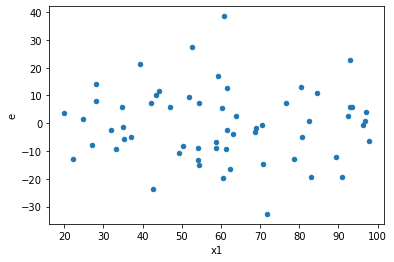

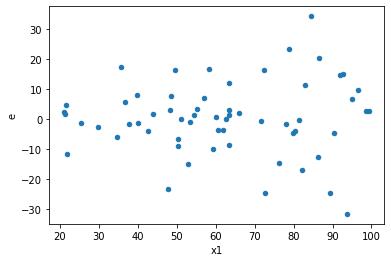

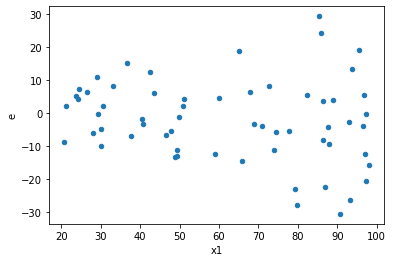

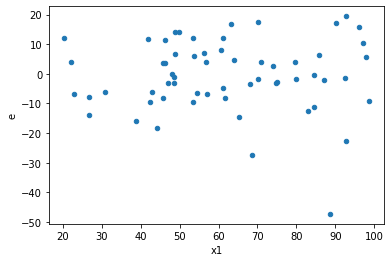

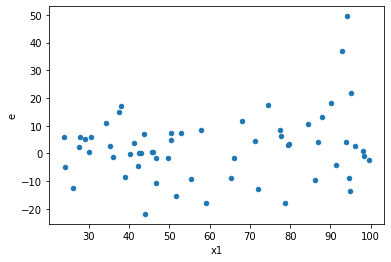

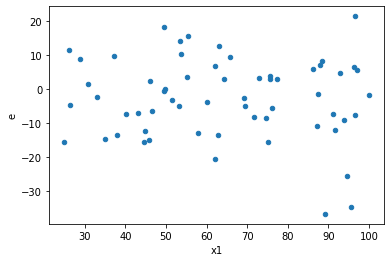

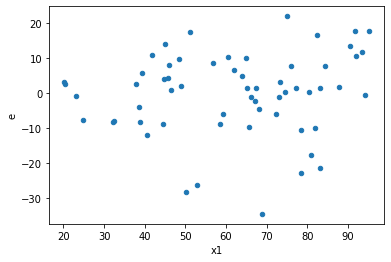

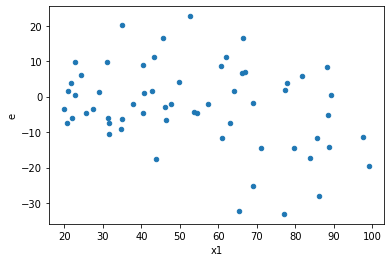

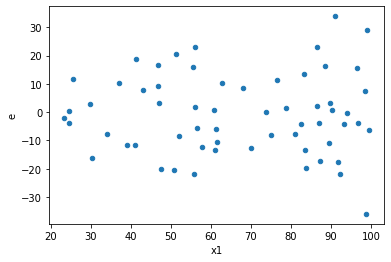

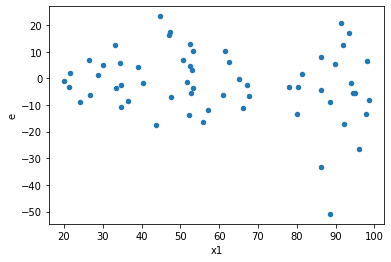

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,23.0,23.0,1809.3662644620472,5981.578147306316,78.66809845487161,260.0686151002746,3.3058968019859334,0.005801593135433825,0.9970992034322831,0.0029007965677169123,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,1381.6479167109646,6055.713538063453,60.071648552650636,263.2918929592806,4.382964331809784,0.0007673513361723394,0.9996163243319138,0.0003836756680861697,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,2186.144811458549,5243.768372696077,95.04977441124127,227.9899292476555,2.3986372472725384,0.040965871881758265,0.9795170640591209,0.020482935940879132,Reject001=1 : Homoscedasticity
4.0,23.0,23.0,1628.252300660707,5400.536110648411,70.79357828959596,234.80591785427873,3.316768604261759,0.005675404238902004,0.997162297880549,0.002837702119451002,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,2274.1129437271406,4291.859501939703,98.8744758142235,186.60258704085663,1.8872675228283038,0.135101246697092,0.932449376651454,0.067550623348546,Reject001=1 : Homoscedasticity
6.0,23.0,23.0,2915.2980315681143,3653.438736645404,126.75208832904845,158.84516246284366,1.2531956242841664,0.5927932000131415,0.7036033999934292,0.29639660000657075,Reject001=1 : Homoscedasticity
7.0,23.0,23.0,1320.3625344346462,4296.991951207321,57.407066714549835,186.82573700901395,3.2544031197062178,0.006441424872554835,0.9967792875637226,0.0032207124362774175,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,4227.157856395912,6478.198830484749,183.78947201721357,281.6608187167282,1.5325187869866022,0.31303541640607446,0.8434822917969628,0.15651770820303723,Reject001=1 : Homoscedasticity
9.0,23.0,23.0,2287.0803246341566,5621.527685146215,99.43827498409377,244.41424718027022,2.457949388395635,0.035800159107141294,0.9820999204464294,0.017900079553570647,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,3279.8728247256654,3072.840461470496,142.60316629242024,133.60175919436938,0.9368779296275043,0.8771001521631346,Reject001=1 : Homoscedasticity
1.0,23.0,23.0,1809.3662644620472,5981.578147306316,78.66809845487161,260.0686151002746,3.3058968019859334,0.005801593135433825,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,1381.6479167109646,6055.713538063453,60.071648552650636,263.2918929592806,4.382964331809784,0.0007673513361723394,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,2186.144811458549,5243.768372696077,95.04977441124127,227.9899292476555,2.3986372472725384,0.040965871881758265,Reject001=1 : Homoscedasticity
4.0,23.0,23.0,1628.252300660707,5400.536110648411,70.79357828959596,234.80591785427873,3.316768604261759,0.005675404238902004,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,2274.1129437271406,4291.859501939703,98.8744758142235,186.60258704085663,1.8872675228283038,0.135101246697092,Reject001=1 : Homoscedasticity
6.0,23.0,23.0,2915.2980315681143,3653.438736645404,126.75208832904845,158.84516246284366,1.2531956242841664,0.5927932000131415,Reject001=1 : Homoscedasticity
7.0,23.0,23.0,1320.3625344346462,4296.991951207321,57.407066714549835,186.82573700901395,3.2544031197062178,0.006441424872554835,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,4227.157856395912,6478.198830484749,183.78947201721357,281.6608187167282,1.5325187869866022,0.31303541640607446,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      604
Reject001=0 : Heteroscedasticity    396
Name: Result_test, dtype: int64